Duplicate key in file PosixPath('/Users/nagatoshota/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:   IPAexGothic')


初期状態(第0世代)
0 [3, 3, 1, 3, 2, 3, 3, 2, 2, 1] 4
1 [3, 3, 3, 3, 3, 3, 2, 3, 2, 2] 2
2 [1, 2, 1, 2, 2, 3, 2, 1, 3, 1] 6
3 [2, 3, 1, 2, 3, 2, 2, 2, 2, 2] 3
4 [1, 1, 2, 1, 2, 3, 1, 3, 2, 1] 4
5 [3, 2, 3, 2, 2, 2, 2, 1, 3, 1] 7
6 [1, 1, 3, 1, 1, 3, 2, 1, 1, 3] 0
7 [3, 2, 3, 3, 2, 2, 3, 1, 2, 3] 4
8 [2, 1, 1, 2, 3, 1, 2, 2, 1, 3] 2
9 [2, 2, 3, 3, 3, 1, 2, 2, 1, 3] 1
正解
[3, 2, 1, 2, 2, 2, 1, 3, 3, 1]
第1世代の処理を始めます
最高評価の個体5,2番目に高い評点の個体2
最低評点の個体5,2番目に低い評点の個体6
優秀な2体を新個体としてコピーします
0 [3, 3, 1, 3, 2, 3, 3, 2, 2, 1] 4
1 [3, 3, 3, 3, 3, 3, 2, 3, 2, 2] 2
2 [1, 2, 1, 2, 2, 3, 2, 1, 3, 1] 6
3 [2, 3, 1, 2, 3, 2, 2, 2, 2, 2] 3
4 [1, 1, 2, 1, 2, 3, 1, 3, 2, 1] 4
5 [3, 2, 3, 2, 2, 2, 2, 1, 3, 1] 7
6 [1, 2, 1, 2, 2, 3, 2, 1, 3, 1] 6
7 [3, 2, 3, 3, 2, 2, 3, 1, 2, 3] 4
8 [2, 1, 1, 2, 3, 1, 2, 2, 1, 3] 2
9 [2, 2, 3, 3, 3, 1, 2, 2, 1, 3] 1
新個体同士を箇所9で交叉します
0 [3, 3, 1, 3, 2, 3, 3, 2, 2, 1] 4
1 [3, 3, 3, 3, 3, 3, 2, 3, 2, 2] 2
2 [1, 2, 1, 2, 2, 3, 2, 1, 3, 1] 6
3 [2, 3, 1, 2, 3, 2, 2, 2, 2, 2] 3
4 [1, 1, 2, 1, 2, 3, 1,

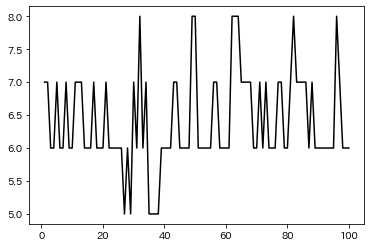

In [1]:
import random
import copy
import matplotlib.pyplot as plt

# クイズに答える個体クラス
class indi_answer(object):
    # 回答リスト:list_ans
    # 評点:score
    def __init__(self, list_ans, score):
        self.list_ans = list_ans
        self.score = score

# 正解:answer
answer = [3,2,1,2,2,2,1,3,3,1]
# 集団:group
group = []
# 選択肢の数:num_choice
num_choice = 3
# 評点リスト list_score
list_score = []
# 設問数:num_question
num_question = 10
# 個体数:num_indi
num_indi = 10
# 点数1問分:point
point = 1
# 満点:perfect
perfect = num_question * point

# 個体の全問を読み込み合計点を返す
def evaluation(indi):
    # 評価値:value_evaluation
    value_evaluation = 0
    for i in range(num_question):
        if indi[i] == answer[i]:
            value_evaluation += point
    return value_evaluation

# 集団の個体を全て評価
def evaluation_all():
    for i in range(num_indi):
        group[i].score = evaluation(group[i].list_ans)


# 突然変異
def mutation(indi, index):
    indi[index] = indi[index]%num_choice+1
    return(indi)

# 交叉 [1,2,3,4,5]で交叉箇所が2なら[1,2]と[3,4,5]に分割して他の遺伝子と入れ替える
def crossover(first, second, point_cross):
    forward_first = first[0:point_cross] #リストの交叉箇所まで
    backword_first = first[point_cross:] # リストの最後まで
    forward_second = second[0:point_cross] #リストの交叉箇所まで
    backword_second = second[point_cross:] # リストの最後まで
    first = forward_first + backword_second #つなげる
    second = forward_second + backword_first #つなげる
    return(first,second)

# 集団を画面出力
def output_group():
    for indi in range(num_indi):
        group[indi].score = evaluation(group[indi].list_ans)
        print(str(indi)+" ",end="")
        print(group[indi].list_ans,end="")
        print(" ",end="")
        print(group[indi].score)

# 集団内の評点の一覧をリストとして得る
def get_list_score():
    group_list_score = []
    for indi in range(num_indi):
        group_list_score.append(group[indi].score)
    return group_list_score

########### メイン処理

# 全個体が当てずっぽうに答え、集団の初期状態とする
for i in range(num_indi):
    list_ans = []
    for j in range(num_question): # 設問数分のランダム回答を作る
        list_ans.append(random.randint(1, num_choice))
    score = evaluation(list_ans)
    group.append(indi_answer(list_ans,score))

print("初期状態(第0世代)")
output_group()

print("正解")
print(answer)

# 選択と淘汰、交叉、突然変異を100世代繰り返す(満点の個体が現れたら打ち切る)
y = [None] * 101
x = [None] * 101
for gene in range(1, 101):


    list_score = get_list_score()
    print("第"+str(gene)+"世代の処理を始めます")

    ##### 選択と淘汰 #####
    parent_list_score = copy.deepcopy(list_score) # deepcopyにより参照ではなく値をコピー
    selection_list_score = copy.deepcopy(list_score)

    y[gene] = max(parent_list_score)
    x[gene] = gene

    max_ind = parent_list_score.index(max(parent_list_score))
    print("最高評価の個体"+str(max_ind)+",",end="")
    parent_list_score[max_ind]=-1
    next_max_ind = parent_list_score.index(max(parent_list_score))
    print("2番目に高い評点の個体"+str(next_max_ind))

    

    min_indi = selection_list_score.index(max(selection_list_score))
    print("最低評点の個体"+str(min_indi)+",",end="")
    selection_list_score[min_indi]=perfect+100
    next_min_indi = selection_list_score.index(min(selection_list_score))
    print("2番目に低い評点の個体"+str(next_min_indi))


    print("優秀な2体を新個体としてコピーします") # 優秀な2個体を劣った2個体の位置に複製
    group[min_indi].list_ans = copy.deepcopy(group[max_ind].list_ans)
    group[next_min_indi].list_ans = copy.deepcopy(group[next_max_ind].list_ans)

    # 集団の個体を全て評価
    evaluation_all()
    # 評価を画面出力
    output_group()


    ##### 新個体同士の交叉 ##### 
    point_cross = random.randint(1, num_question-1)
    print("新個体同士を箇所"+str(point_cross)+"で交叉します")
    new = crossover(group[min_indi].list_ans, group[next_min_indi].list_ans, point_cross)
    group[min_indi].list_ans = copy.deepcopy(new[0])
    group[next_min_indi].list_ans = copy.deepcopy(new[1])

    # 集団の個体を全て評価
    evaluation_all()
    # 評価を画面出力
    output_group()

    ##### 突然変異 #####
    mutation_point = random.randint(0, num_question-1)
    print("突然変異させます")
    print("最低評価の個体"+str(min_indi)+"における突然変異"+str(mutation_point))
    group[min_indi].list_ans = mutation(group[min_indi].list_ans, mutation_point)

    mutation_point = random.randint(0, num_question-1)
    print("突然変異させます")
    print("2番目に低い評価の個体"+str(min_indi)+"における突然変異"+str(mutation_point))
    group[next_min_indi].list_ans = mutation(group[next_min_indi].list_ans, mutation_point)

    # 集団の個体を全て評価
    evaluation_all()
    # 評価を画面出力
    output_group()

    if perfect in list_score:
        print("第"+str(gene)+"世代で満点の個体が現れました！")
        break

    print("第"+str(gene)+"世代の処理を終わります")

plt.figure()
plt.plot(x,y,color='black')





初期状態(第0世代)
0 [1, 1, 2, 1, 3, 1, 3, 1, 3, 1] 2
1 [1, 1, 2, 2, 3, 3, 2, 3, 1, 2] 2
2 [2, 3, 2, 3, 2, 2, 1, 3, 1, 3] 4
3 [1, 1, 3, 2, 1, 1, 1, 2, 2, 2] 2
4 [2, 2, 2, 3, 1, 1, 3, 2, 1, 2] 1
5 [1, 2, 1, 2, 3, 3, 1, 3, 2, 2] 5
6 [2, 3, 2, 1, 2, 2, 2, 3, 1, 1] 4
7 [1, 1, 2, 1, 3, 2, 3, 2, 1, 1] 2
8 [2, 1, 1, 1, 1, 1, 2, 2, 2, 2] 1
9 [3, 2, 1, 2, 1, 3, 3, 2, 3, 3] 5
正解
[3, 2, 1, 2, 2, 2, 1, 3, 3, 1]
第1世代の処理を始めます
最高評価の個体5,2番目に高い評点の個体9
最低評点の個体5,2番目に低い評点の個体4
優秀な2体を新個体としてコピーします
0 [1, 1, 2, 1, 3, 1, 3, 1, 3, 1] 2
1 [1, 1, 2, 2, 3, 3, 2, 3, 1, 2] 2
2 [2, 3, 2, 3, 2, 2, 1, 3, 1, 3] 4
3 [1, 1, 3, 2, 1, 1, 1, 2, 2, 2] 2
4 [3, 2, 1, 2, 1, 3, 3, 2, 3, 3] 5
5 [1, 2, 1, 2, 3, 3, 1, 3, 2, 2] 5
6 [2, 3, 2, 1, 2, 2, 2, 3, 1, 1] 4
7 [1, 1, 2, 1, 3, 2, 3, 2, 1, 1] 2
8 [2, 1, 1, 1, 1, 1, 2, 2, 2, 2] 1
9 [3, 2, 1, 2, 1, 3, 3, 2, 3, 3] 5
新個体同士を箇所2で交叉します
0 [1, 1, 2, 1, 3, 1, 3, 1, 3, 1] 2
1 [1, 1, 2, 2, 3, 3, 2, 3, 1, 2] 2
2 [2, 3, 2, 3, 2, 2, 1, 3, 1, 3] 4
3 [1, 1, 3, 2, 1, 1, 1, 2, 2, 2] 2
4 [3, 2, 1, 2, 3, 3, 1,

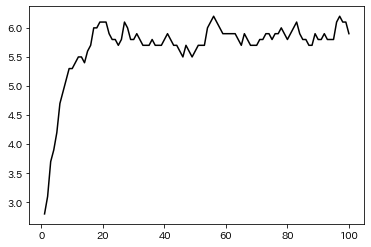

In [2]:
import random
import copy
import matplotlib.pyplot as plt

# クイズに答える個体クラス
class indi_answer(object):
    # 回答リスト:list_ans
    # 評点:score
    def __init__(self, list_ans, score):
        self.list_ans = list_ans
        self.score = score

# 正解:answer
answer = [3,2,1,2,2,2,1,3,3,1]
# 集団:group
group = []
# 選択肢の数:num_choice
num_choice = 3
# 評点リスト list_score
list_score = []
# 設問数:num_question
num_question = 10
# 個体数:num_indi
num_indi = 10
# 点数1問分:point
point = 1
# 満点:perfect
perfect = num_question * point

# 個体の全問を読み込み合計点を返す
def evaluation(indi):
    # 評価値:value_evaluation
    value_evaluation = 0
    for i in range(num_question):
        if indi[i] == answer[i]:
            value_evaluation += point
    return value_evaluation

# 集団の個体を全て評価
def evaluation_all():
    for i in range(num_indi):
        group[i].score = evaluation(group[i].list_ans)


# 突然変異
def mutation(indi, index):
    indi[index] = indi[index]%num_choice+1
    return(indi)

# 交叉 [1,2,3,4,5]で交叉箇所が2なら[1,2]と[3,4,5]に分割して他の遺伝子と入れ替える
def crossover(first, second, point_cross):
    forward_first = first[0:point_cross] #リストの交叉箇所まで
    backword_first = first[point_cross:] # リストの最後まで
    forward_second = second[0:point_cross] #リストの交叉箇所まで
    backword_second = second[point_cross:] # リストの最後まで
    first = forward_first + backword_second #つなげる
    second = forward_second + backword_first #つなげる
    return(first,second)

# 集団を画面出力
def output_group():
    for indi in range(num_indi):
        group[indi].score = evaluation(group[indi].list_ans)
        print(str(indi)+" ",end="")
        print(group[indi].list_ans,end="")
        print(" ",end="")
        print(group[indi].score)

# 集団内の評点の一覧をリストとして得る
def get_list_score():
    group_list_score = []
    for indi in range(num_indi):
        group_list_score.append(group[indi].score)
    return group_list_score

########### メイン処理

# 全個体が当てずっぽうに答え、集団の初期状態とする
for i in range(num_indi):
    list_ans = []
    for j in range(num_question): # 設問数分のランダム回答を作る
        list_ans.append(random.randint(1, num_choice))
    score = evaluation(list_ans)
    group.append(indi_answer(list_ans,score))

print("初期状態(第0世代)")
output_group()

print("正解")
print(answer)

# 選択と淘汰、交叉、突然変異を100世代繰り返す(満点の個体が現れたら打ち切る)
y = [None] * 101
x = [None] * 101
for gene in range(1, 101):


    list_score = get_list_score()
    print("第"+str(gene)+"世代の処理を始めます")

    ##### 選択と淘汰 #####
    parent_list_score = copy.deepcopy(list_score) # deepcopyにより参照ではなく値をコピー
    selection_list_score = copy.deepcopy(list_score)

    y[gene] = sum(parent_list_score) / len(parent_list_score)
    x[gene] = gene

    max_ind = parent_list_score.index(max(parent_list_score))
    print("最高評価の個体"+str(max_ind)+",",end="")
    parent_list_score[max_ind]=-1
    next_max_ind = parent_list_score.index(max(parent_list_score))
    print("2番目に高い評点の個体"+str(next_max_ind))

    

    min_indi = selection_list_score.index(max(selection_list_score))
    print("最低評点の個体"+str(min_indi)+",",end="")
    selection_list_score[min_indi]=perfect+100
    next_min_indi = selection_list_score.index(min(selection_list_score))
    print("2番目に低い評点の個体"+str(next_min_indi))


    print("優秀な2体を新個体としてコピーします") # 優秀な2個体を劣った2個体の位置に複製
    group[min_indi].list_ans = copy.deepcopy(group[max_ind].list_ans)
    group[next_min_indi].list_ans = copy.deepcopy(group[next_max_ind].list_ans)

    # 集団の個体を全て評価
    evaluation_all()
    # 評価を画面出力
    output_group()


    ##### 新個体同士の交叉 ##### 
    point_cross = random.randint(1, num_question-1)
    print("新個体同士を箇所"+str(point_cross)+"で交叉します")
    new = crossover(group[min_indi].list_ans, group[next_min_indi].list_ans, point_cross)
    group[min_indi].list_ans = copy.deepcopy(new[0])
    group[next_min_indi].list_ans = copy.deepcopy(new[1])

    # 集団の個体を全て評価
    evaluation_all()
    # 評価を画面出力
    output_group()

    ##### 突然変異 #####
    mutation_point = random.randint(0, num_question-1)
    print("突然変異させます")
    print("最低評価の個体"+str(min_indi)+"における突然変異"+str(mutation_point))
    group[min_indi].list_ans = mutation(group[min_indi].list_ans, mutation_point)

    mutation_point = random.randint(0, num_question-1)
    print("突然変異させます")
    print("2番目に低い評価の個体"+str(min_indi)+"における突然変異"+str(mutation_point))
    group[next_min_indi].list_ans = mutation(group[next_min_indi].list_ans, mutation_point)

    # 集団の個体を全て評価
    evaluation_all()
    # 評価を画面出力
    output_group()

    if perfect in list_score:
        print("第"+str(gene)+"世代で満点の個体が現れました！")
        break

    print("第"+str(gene)+"世代の処理を終わります")

plt.figure()
plt.plot(x,y,color='black')



